# Test Cascade and Parallel NAS deployed on the XEM7310 Artix-7 board using the OKAERTool

This notebook is a simple example of how to test the Cascade and Parallel NAS model deployed both on the XEM7310 Artix-7 board using the OKAERTool (deployed on the same FPGA board too). The pyOKAERTool is a Python package that provides a simple interface to interact with the OKAERTool IP block. The OKAERTool IP an open-source hardware platform that can be used to deploy and test AER based systems on the edge.

## Monitoring the CPNAS outputs
The okaertool is deployed on the Artix-7 FPGA where a stereo 64 channels Cascade and Parallel NAS are deployed. The script below initializes the OKAERTool and configure the settings to pyNAVIS tool. This tool is used to visualize the AER events received from the Neuromorphic Auditory Sensor (NAS).

In [20]:
import sys
import os

# Add repository root (assumed one level up) to sys.path so the top-level
# folder `pyOKAERTool` can be imported.
repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if os.path.isdir(os.path.join(repo_root, 'pyOKAERTool')) and repo_root not in sys.path:
    sys.path.insert(0, repo_root)
else:
    # fallback: walk up a few parent directories to find the folder
    p = os.path.abspath(os.getcwd())
    for _ in range(4):
        if os.path.isdir(os.path.join(p, 'pyOKAERTool')):
            if p not in sys.path:
                sys.path.insert(0, p)
            break
        p = os.path.dirname(p)

import pyOKAERTool as okt
from pyNAVIS import *
import os

# Define bitfile path
bitfile_path = '../../bitfiles/CNAS_okaertool_XEM6310_config_0_rst.bit'
# bitfile_path = '../../bitfiles/CPNAS_okaertool_XEM7310.bit'
# bitfile_path = None  # Set to None if no .bit file is to be used

# Validate the existence of the .bit file
if bitfile_path is None:
    None
elif not os.path.exists(bitfile_path):
    print(f"El archivo .bit no existe en la ruta especificada: {bitfile_path}")
    sys.exit(1)

# Create a new intance of the OkaerTool class and initialize it
okaer = okt.Okaertool(bit_file=bitfile_path)
okaer.init()

# Create a new instance of the PyNAVIS class
settings = MainSettings(num_channels=64, mono_stereo=1, on_off_both=1, address_size=4, ts_tick=0.01, bin_size=10000)

10/20/25 12:47:03 PM - INFO : okaertool initialized as idle


### Configure Cascade and Parallel NAS
Both NAS sensors need to be configure before testing. The configuration is done using the `set_config` method of the OKAERTool class. The configuration parameters are passed as a list of values. The parameters are:
- PDM2Spikes_DEFAULT_parameter
- I2S2Spikes_DEFAULT_parameter
- CASCADE_FILTER_DEFAULT_parameter
- PARALLEL_FILTER_DEFAULT_parameter


In [21]:
PDM2Spikes_DEFAULT_parameter = [0x0005, 0x0006, 0x734B, 0x39C8]
I2S2Spikes_DEFAULT_parameter = [0x000F]

CASCADE_FILTER_DEFAULT_parameter = [
    	0x04, 0x77B4, 0x77B4, 0x2025, 
		0x04, 0x6B1C, 0x6B1C, 0x2025,
		0x02, 0x7303, 0x7303, 0x2025, 
		0x02, 0x66E9, 0x66E9, 0x2025, 
		0x03, 0x7AC8, 0x7AC8, 0x2025, 
		0x03, 0x6DDD, 0x6DDD, 0x2025, 
		0x04, 0x7AE1, 0x7AE1, 0x2025, 
		0x04, 0x6DF4, 0x6DF4, 0x2025, 
		0x02, 0x7610, 0x7610, 0x2025, 
		0x02, 0x69A4, 0x69A4, 0x2025, 
		0x03, 0x7E0A, 0x7E0A, 0x2025, 
		0x03, 0x70C7, 0x70C7, 0x2025, 
		0x04, 0x7E24, 0x7E24, 0x2025, 
		0x04, 0x70DF, 0x70DF, 0x2025, 
		0x02, 0x7932, 0x7932, 0x2025, 
		0x02, 0x6C72, 0x6C72, 0x2025, 
		0x02, 0x6109, 0x6109, 0x2025, 
		0x03, 0x73C5, 0x73C5, 0x2025, 
		0x03, 0x6797, 0x6797, 0x2025, 
		0x04, 0x73DD, 0x73DD, 0x2025, 
		0x02, 0x7C69, 0x7C69, 0x2025, 
		0x02, 0x6F52, 0x6F52, 0x2025, 
		0x02, 0x639C, 0x639C, 0x2025, 
		0x03, 0x76D8, 0x76D8, 0x2025, 
		0x03, 0x6A57, 0x6A57, 0x2025, 
		0x04, 0x76F1, 0x76F1, 0x2025, 
		0x02, 0x7FB6, 0x7FB6, 0x2025, 
		0x02, 0x7247, 0x7247, 0x2025, 
		0x02, 0x6641, 0x6641, 0x2025, 
		0x03, 0x79FF, 0x79FF, 0x2025, 
		0x03, 0x6D29, 0x6D29, 0x2025, 
		0x04, 0x7A19, 0x7A19, 0x2025, 
		0x04, 0x6D40, 0x6D40, 0x2025, 
		0x02, 0x754F, 0x754F, 0x2025, 
		0x02, 0x68F7, 0x68F7, 0x2025, 
		0x03, 0x7D3C, 0x7D3C, 0x2025, 
		0x03, 0x700F, 0x700F, 0x2025, 
		0x04, 0x7D56, 0x7D56, 0x2025, 
		0x04, 0x7026, 0x7026, 0x2025, 
		0x02, 0x786C, 0x786C, 0x2025, 
		0x02, 0x6BC1, 0x6BC1, 0x2025, 
		0x02, 0x606A, 0x606A, 0x2025, 
		0x03, 0x7308, 0x7308, 0x2025, 
		0x03, 0x66EE, 0x66EE, 0x2025, 
		0x04, 0x7320, 0x7320, 0x2025, 
		0x02, 0x7B9E, 0x7B9E, 0x2025, 
		0x02, 0x6E9C, 0x6E9C, 0x2025, 
		0x02, 0x62F9, 0x62F9, 0x2025, 
		0x03, 0x7615, 0x7615, 0x2025, 
		0x03, 0x69A9, 0x69A9, 0x2025, 
		0x04, 0x762E, 0x762E, 0x2025, 
		0x02, 0x7EE6, 0x7EE6, 0x2025, 
		0x02, 0x718C, 0x718C, 0x2025, 
		0x02, 0x659A, 0x659A, 0x2025, 
		0x03, 0x7937, 0x7937, 0x2025, 
		0x03, 0x6C77, 0x6C77, 0x2025, 
		0x04, 0x7951, 0x7951, 0x2025, 
		0x04, 0x6C8E, 0x6C8E, 0x2025, 
		0x02, 0x748F, 0x748F, 0x2025, 
		0x02, 0x684C, 0x684C, 0x2025, 
		0x03, 0x7C6F, 0x7C6F, 0x2025, 
		0x03, 0x6F57, 0x6F57, 0x2025,
		0x04, 0x7C89, 0x7C89, 0x2025, 
		0x04, 0x6F6F, 0x6F6F, 0x2025, 
		0x02, 0x77A7, 0x77A7, 0x2025]

PARALLEL_FILTER_DEFAULT_parameter = [
    	0x00, 0x7FFF, 0x1012, 0x5E5C, 
		0x00, 0x7FFF, 0x1012, 0x546E, 
		0x00, 0x7FFF, 0x1012, 0x4B8C,
		0x00, 0x7FFF, 0x1012, 0x439A, 
		0x00, 0x7FFF, 0x1012, 0x78FB, 
		0x00, 0x7FFF, 0x1012, 0x6C41, 
		0x00, 0x7FFF, 0x1012, 0x60DD,
		0x00, 0x7FFF, 0x1012, 0x56AC, 
		0x00, 0x7FFF, 0x1012, 0x4D8E, 
		0x00, 0x7FFF, 0x1012, 0x4565, 
		0x00, 0x7FFF, 0x1012, 0x7C31,
		0x00, 0x7FFF, 0x1012, 0x6F20, 
		0x00, 0x7FFF, 0x1012, 0x636F, 
		0x00, 0x7FFF, 0x1012, 0x58F9, 
		0x00, 0x7FFF, 0x1012, 0x4F9C,
		0x00, 0x7FFF, 0x1012, 0x473C, 
		0x00, 0x7FFF, 0x1012, 0x7F7D, 
		0x00, 0x7FFF, 0x1012, 0x7213, 
		0x00, 0x7FFF, 0x1012, 0x6612,
		0x00, 0x7FFF, 0x1012, 0x5B55, 
		0x00, 0x7FFF, 0x1012, 0x51B9, 
		0x00, 0x7FFF, 0x1012, 0x4920, 
		0x00, 0x7FFF, 0x1012, 0x416F,
		0x00, 0x7FFF, 0x1012, 0x751A, 
		0x00, 0x7FFF, 0x1012, 0x68C8, 
		0x00, 0x7FFF, 0x1012, 0x5DC2, 
		0x00, 0x7FFF, 0x1012, 0x53E4,
		0x00, 0x7FFF, 0x1012, 0x4B11, 
		0x00, 0x7FFF, 0x1012, 0x432B, 
		0x00, 0x7FFF, 0x1012, 0x7835, 
		0x00, 0x7FFF, 0x1012, 0x6B90,
		0x00, 0x7FFF, 0x1012, 0x603F, 
		0x00, 0x7FFF, 0x1012, 0x561E, 
		0x00, 0x7FFF, 0x1012, 0x4D0F, 
		0x00, 0x7FFF, 0x1012, 0x44F3,
		0x00, 0x7FFF, 0x1012, 0x7B66, 
		0x00, 0x7FFF, 0x1012, 0x6E6A, 
		0x00, 0x7FFF, 0x1012, 0x62CC, 
		0x00, 0x7FFF, 0x1012, 0x5867,
		0x00, 0x7FFF, 0x1012, 0x4F1A, 
		0x00, 0x7FFF, 0x1012, 0x46C8, 
		0x00, 0x7FFF, 0x1012, 0x7EAC, 
		0x00, 0x7FFF, 0x1012, 0x7158,
		0x00, 0x7FFF, 0x1012, 0x656C, 
		0x00, 0x7FFF, 0x1012, 0x5AC0, 
		0x00, 0x7FFF, 0x1012, 0x5134, 
		0x00, 0x7FFF, 0x1012, 0x48A9,
		0x00, 0x7FFF, 0x1012, 0x4104, 
		0x00, 0x7FFF, 0x1012, 0x745A, 
		0x00, 0x7FFF, 0x1012, 0x681D, 
		0x00, 0x7FFF, 0x1012, 0x5D28,
		0x00, 0x7FFF, 0x1012, 0x535B, 
		0x00, 0x7FFF, 0x1012, 0x4A96, 
		0x00, 0x7FFF, 0x1012, 0x42BD, 
		0x00, 0x7FFF, 0x1012, 0x7771,
		0x00, 0x7FFF, 0x1012, 0x6AE0, 
		0x00, 0x7FFF, 0x1012, 0x5FA1, 
		0x00, 0x7FFF, 0x1012, 0x5592, 
		0x00, 0x7FFF, 0x1012, 0x4C91,
		0x00, 0x7FFF, 0x1012, 0x4483, 
		0x00, 0x7FFF, 0x1012, 0x7A9C, 
		0x00, 0x7FFF, 0x1012, 0x6DB6, 
		0x00, 0x7FFF, 0x1012, 0x622B,
		0x00, 0x7FFF, 0x1012, 0x57D7, 
		0x00, 0x7FFF, 0x1012, 0x57D7]

### Load the config file exported from pyOpenNAS
The configuration parameters are loaded from a config file exported from the pyOpenNAS tool. The config file is a text file that contains the configuration parameters in a specific format. This file only contains the parameters for the Cascade NAS. This file has to be parsed to extract the parameters and save them in a list.

In [7]:
import re
import os

config_file_path = './CFBank_64.vhd'

def _tok_to_int(tok):
    tok = tok.strip().rstrip(',').strip()
    if tok.lower().startswith('x"') and tok.endswith('"'):
        return int(tok[2:-1], 16)
    if tok.lower().startswith('0x'):
        return int(tok, 16)
    m = re.match(r'16#([0-9A-Fa-f]+)#', tok)
    if m:
        return int(m.group(1), 16)
    if tok.isdigit():
        return int(tok, 10)
    raise ValueError(f"Unrecognized token: {tok!r}")

def parse_cascade_vhd(path):
    if not os.path.exists(path):
        raise FileNotFoundError(path)
    text = open(path, 'r', encoding='utf-8', errors='ignore').read()

    # Find successive groups of the four parameters in the file order
    pattern = re.compile(
        r'FREQ_DIV\s*=>\s*(?P<f>[^,\n;]+)\s*,\s*'
        r'SPIKES_DIV_FB\s*=>\s*(?P<fb>[^,\n;]+)\s*,\s*'
        r'SPIKES_DIV_OUT\s*=>\s*(?P<out>[^,\n;]+)\s*,\s*'
        r'SPIKES_DIV_BPF\s*=>\s*(?P<bpf>[^,\n;]+)',
        re.IGNORECASE | re.DOTALL
    )

    values = []
    for m in pattern.finditer(text):
        f = _tok_to_int(m.group('f'))
        fb = _tok_to_int(m.group('fb'))
        out = _tok_to_int(m.group('out'))
        bpf = _tok_to_int(m.group('bpf'))
        values.extend([f, fb, out, bpf])

    return values

CASCADE_FILTER_DEFAULT_parameter = parse_cascade_vhd(config_file_path)

# quick validation / pretty print
filters = len(CASCADE_FILTER_DEFAULT_parameter) // 4
print(f"Parsed {filters} filters ({len(CASCADE_FILTER_DEFAULT_parameter)} values).")
print("CASCADE_FILTER_DEFAULT_parameter = [")
for v in CASCADE_FILTER_DEFAULT_parameter:
    # print as hex literal (4 hex digits minimum)
    width = max(2, (v.bit_length() + 3) // 4)
    print(f"    0x{v:0{width}X},")
print("]")

Parsed 65 filters (260 values).
CASCADE_FILTER_DEFAULT_parameter = [
    0x04,
    0x6BD2,
    0x6BD2,
    0x2025,
    0x02,
    0x7FF8,
    0x7FF8,
    0x2025,
    0x02,
    0x7E91,
    0x7E91,
    0x2025,
    0x02,
    0x7D2F,
    0x7D2F,
    0x2025,
    0x02,
    0x7BD0,
    0x7BD0,
    0x2025,
    0x02,
    0x7A75,
    0x7A75,
    0x2025,
    0x02,
    0x791E,
    0x791E,
    0x2025,
    0x02,
    0x77CB,
    0x77CB,
    0x2025,
    0x02,
    0x767B,
    0x767B,
    0x2025,
    0x02,
    0x752F,
    0x752F,
    0x2025,
    0x02,
    0x73E7,
    0x73E7,
    0x2025,
    0x02,
    0x72A2,
    0x72A2,
    0x2025,
    0x02,
    0x7161,
    0x7161,
    0x2025,
    0x02,
    0x7024,
    0x7024,
    0x2025,
    0x02,
    0x6EEA,
    0x6EEA,
    0x2025,
    0x02,
    0x6DB3,
    0x6DB3,
    0x2025,
    0x02,
    0x6C80,
    0x6C80,
    0x2025,
    0x02,
    0x6B50,
    0x6B50,
    0x2025,
    0x02,
    0x6A23,
    0x6A23,
    0x2025,
    0x02,
    0x68FA,
    0x68FA,
    0x2025,
    0x02,
 

El siguiente código configura el NAS con los parámetros cargados en las listas PDM2Spikes_DEFAULT_parameter, I2S2Spikes_DEFAULT_parameter, CASCADE_FILTER_DEFAULT_parameter y PARALLEL_FILTER_DEFAULT_parameter.

In [28]:
# Reset the OkaerTool
okaer.reset_board()

# # Configure the PDM2Spikes (left and right) for both NAS
# register_address = 0x0000
# okaer.logger.info("Configuring PDM2Spikes modules")
# # Left cochlea
# okaer.logger.info("Left cochlea")
# for value in PDM2Spikes_DEFAULT_parameter:
#     okaer.set_config('port_a', register_address, value)
#     # okaer.set_config('port_b', register_address, value)
#     register_address += 1
# # Right cochlea
# okaer.logger.info("Right cochlea")
# for value in PDM2Spikes_DEFAULT_parameter:
#     okaer.set_config('port_a', register_address, value)
#     # okaer.set_config('port_b', register_address, value)
#     register_address += 1

register_address = 0x08
okaer.logger.info("Configuring I2S2Spikes modules")
# Configure I2S2Spikes modules for both NAS
for value in I2S2Spikes_DEFAULT_parameter:
    okaer.set_config('port_a', register_address, value)
    # okaer.set_config('port_b', register_address, value)

# Configure the filters for CASCADE NAS
okaer.logger.info("Configuring filters for Cascade NAS")
# Left cochlea
register_address = 0x09
okaer.logger.info("Left cochlea")
for value in CASCADE_FILTER_DEFAULT_parameter:
    okaer.set_config('port_a', register_address, value)
    register_address += 1
    # # Config only 32 filters
    # if register_address >= 0x09 + 32*4:
    #     break
# Right cochlea
register_address = 0x010D
okaer.logger.info("Right cochlea")
for value in CASCADE_FILTER_DEFAULT_parameter:
    okaer.set_config('port_a', register_address, value)
    register_address += 1
    # # Config only 32 filters
    # if register_address >= 0x010D + 32*4:
    #     break


# # Configure the filters for PARALLEL NAS
# register_address = 0x09
# okaer.logger.info("Configuring filters for Parallel NAS")
# # Left cochlea
# okaer.logger.info("Left cochlea")
# for value in PARALLEL_FILTER_DEFAULT_parameter:
#     okaer.set_config('port_b', register_address, value)
#     register_address += 1
# # Right cochlea
# okaer.logger.info("Right cochlea")
# for value in PARALLEL_FILTER_DEFAULT_parameter:
#     okaer.set_config('port_b', register_address, value)
#     register_address += 1


10/20/25 12:49:45 PM - INFO : Board reset
10/20/25 12:49:45 PM - INFO : Configuring I2S2Spikes modules
10/20/25 12:49:45 PM - INFO : Configuring port_a with address 0x8 and value 0xf
10/20/25 12:49:45 PM - INFO : Configuring filters for Cascade NAS
10/20/25 12:49:45 PM - INFO : Left cochlea
10/20/25 12:49:45 PM - INFO : Configuring port_a with address 0x9 and value 0x4
10/20/25 12:49:45 PM - INFO : Configuring port_a with address 0xa and value 0x77b4
10/20/25 12:49:45 PM - INFO : Configuring port_a with address 0xb and value 0x77b4
10/20/25 12:49:45 PM - INFO : Configuring port_a with address 0xc and value 0x2025
10/20/25 12:49:45 PM - INFO : Configuring port_a with address 0xd and value 0x4
10/20/25 12:49:45 PM - INFO : Configuring port_a with address 0xe and value 0x6b1c
10/20/25 12:49:45 PM - INFO : Configuring port_a with address 0xf and value 0x6b1c
10/20/25 12:49:45 PM - INFO : Configuring port_a with address 0x10 and value 0x2025
10/20/25 12:49:45 PM - INFO : Configuring port_a 

### Monitor de NAS outputs
The script below monitors the output of the NAS.

10/20/25 12:49:48 PM - INFO : Buffer length: 1024
10/20/25 12:49:49 PM - INFO : Monitoring duration: 0.5001428127288818 seconds
10/20/25 12:49:49 PM - INFO : Number of spikes: 236288. Number of read bytes: 1890304
10/20/25 12:49:49 PM - INFO : Input 0: 235047 spikes
10/20/25 12:49:49 PM - INFO : Input 1: 0 spikes
10/20/25 12:49:49 PM - INFO : Input 2: 0 spikes
10/20/25 12:49:49 PM - INFO : Creating spike files for all selected inputs
10/20/25 12:49:49 PM - INFO : Ploting the spikegram for input port_a
10/20/25 12:49:49 PM - INFO : Ploting the sonogram for input port_a
10/20/25 12:49:49 PM - INFO : Ploting the histogram for input port_a
10/20/25 12:49:49 PM - INFO : Ploting the average activity for input port_a


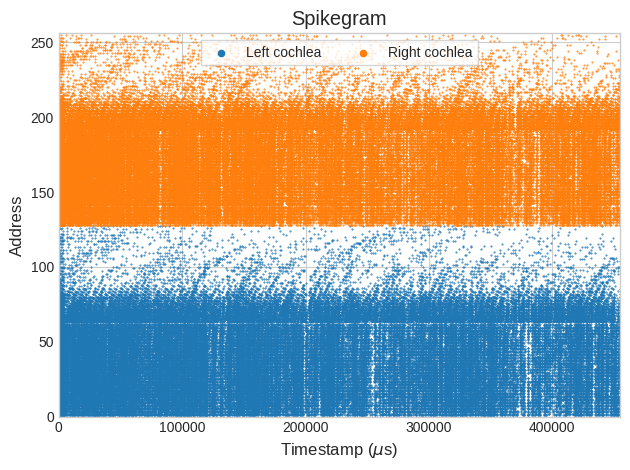

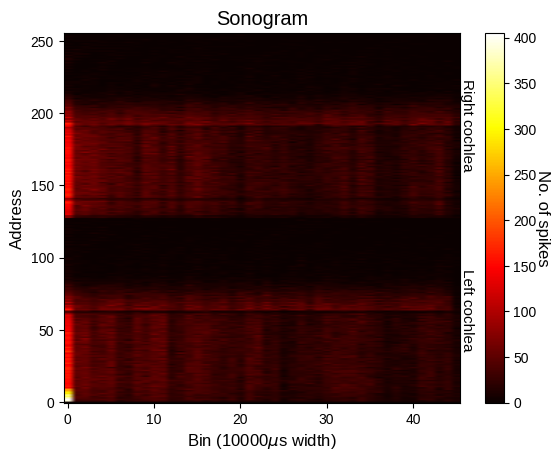

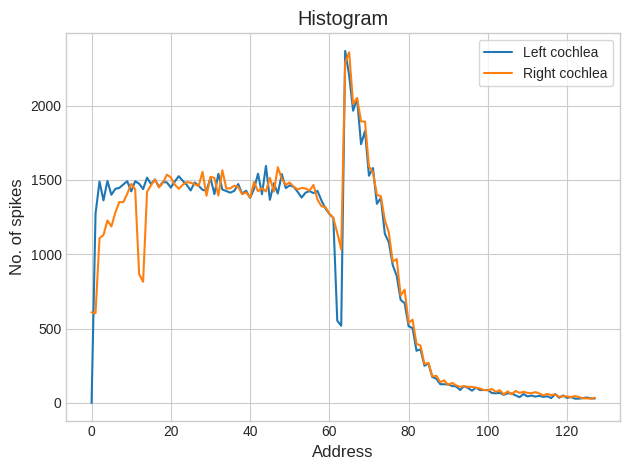

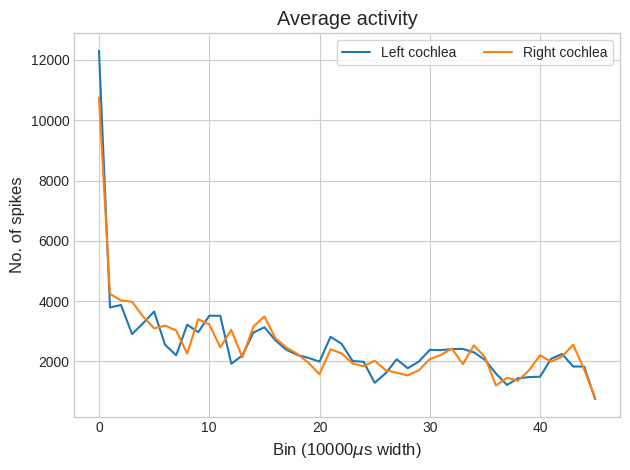

In [29]:
# Monitor the inputs
MAX_INPUTS = 3
INPUTS = ['port_a']
MAX_SPIKES = 10000000
DURATION = 0.5 # in seconds

# # Monitor for a specific number of spikes
# spikes = okaer.monitor(inputs=INPUTS, max_spikes=MAX_SPIKES)
# Monitor for a specific duration
spikes = okaer.monitor(inputs=INPUTS, duration=DURATION)
# # Monitor for a specific duration or until max_spikes is reached
# spikes = okaer.monitor(inputs=INPUTS, max_spikes=MAX_SPIKES, duration=DURATION)
# # Monitor forever
# okaer.monitor_forever(inputs=INPUTS)
# time.sleep(DURATION)
# spikes = okaer.monitor_stop()

# Check if spikes is not None. If so, finish the script
if spikes is None:
    okaer.logger.error("No spikes were recorded. Exiting the script.")
    sys.exit(1)
    
# Print the number of spikes for each input
for i in range(MAX_INPUTS):
    okaer.logger.info("Input %d: %d spikes", i, spikes[i].get_num_spikes())

# Create pyNAVIS spike_file only if there are spikes for a specific input
okaer.logger.info("Creating spike files for all selected inputs")
spike_files = []
for i in range(MAX_INPUTS):
    if spikes[i].get_num_spikes() > 0:
        spike_files.append(SpikesFile(addresses=spikes[i].addresses, timestamps=spikes[i].timestamps))

for i in range(len(spike_files)):
    okaer.logger.info("Ploting the spikegram for input %s", INPUTS[i])
    Plots.spikegram(spike_files[i], settings)

for i in range(len(spike_files)):
    okaer.logger.info("Ploting the sonogram for input %s", INPUTS[i])
    Plots.sonogram(spike_files[i], settings)

for i in range(len(spike_files)):
    okaer.logger.info("Ploting the histogram for input %s", INPUTS[i])
    Plots.histogram(spike_files[i], settings)

for i in range(len(spike_files)):
    okaer.logger.info("Ploting the average activity for input %s", INPUTS[i])
    Plots.average_activity(spike_files[i], settings)


### Bypassing the NAS output to OKAERTool output data bus
The NAS output can be bypassed to the OKAERTool output data bus using the `bypass` command of the OKAERTool class. This is useful to test the NAS output without the OKAERTool processing. The script below bypasses the NAS output to the OKAERTool output data bus.

In [24]:
# Reset the OkaerTool
# okaer.reset_board()

# Monitor the inputs
INPUTS = ['port_a']

# Bypass the inputs to the outputs
okaer.bypass(inputs=INPUTS)

10/20/25 12:49:09 PM - INFO : Bypassing data over ['port_a']
